In [7]:
from sklearn.utils.extmath import randomized_svd
from matplotlib import pyplot as plt
from irspack.dataset import MovieLens1MDataManager
from irspack.utils import df_to_sparse
import scipy.sparse as sps
import pandas as pd
import numpy as np

In [3]:
R = sps.csr_matrix([[1, 0, 1], [0, 1, 1], [1, 1, 1]])

# SVD 実行
O, Sigma, QT = randomized_svd(R, n_components=2)
P = O * Sigma
Q = QT.transpose()

print(P.dot(QT))

[[1.10355339 0.10355339 0.85355339]
 [0.10355339 1.10355339 0.85355339]
 [0.85355339 0.85355339 1.20710678]]


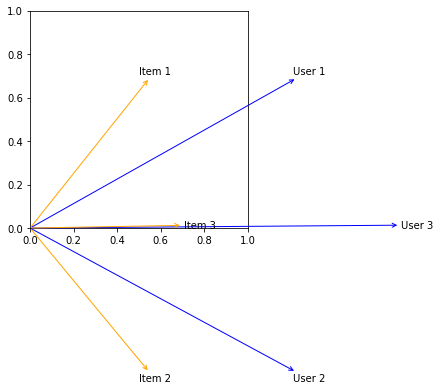

In [4]:
figure, ax = plt.subplots()
ax.set_aspect("equal")
for user_index, user_vector in enumerate(P):
    ax.annotate(
        f"User {user_index+1}",
        xy=(0, 0),
        xytext=user_vector,
        arrowprops=dict(arrowstyle="<-", color="blue"),
    )

for item_index, item_vector in enumerate(Q):
    ax.annotate(
        f"Item {item_index + 1}",
        xy=(0, 0),
        xytext=item_vector,
        arrowprops=dict(arrowstyle="<-", color="orange"),
    )

In [13]:

# 初回は公式サイトからダウンロードの許可を求められます。
# data_manager = MovieLens1MDataManager()

rating_df = pd.read_csv('example.csv')
# rating_df は以下のような userId, movieId, rating, 閲覧時刻を表す4つの列からなります。
print(rating_df.head(3))
#    userId  movieId  rating           timestamp
# 0       1     1193       5 2000-12-31 22:12:40
# 1       1      661       3 2000-12-31 22:35:09
# 2       1      914       3 2000-12-31 22:32:48


# np.uniqueを用いた連載第一回の方法も参照のこと。
# R の　第 i 行は userIdが user_ids[i] のユーザーの行動履歴に相当し、
# 第 j 行は movieIdが movie_ids[i] のアイテムの視聴履歴に相当します。
R, user_ids, movie_ids = df_to_sparse(rating_df, "userId", "movieId")

# R は ユーザー数 U=6040, アイテム数 I = 3706の疎行列になります。
print(repr(R))
# <6040x3706 sparse matrix of type '<class 'numpy.float64'>'
# 	with 1000209 stored elements in Compressed Sparse Row format>

   userId  movieId  rating timestamp
0       1        1       4  22:12:40
1       1        3       5  22:12:40
2       1        2       5  22:12:40
<10x6 sparse matrix of type '<class 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>


In [14]:
O, Sigma, QT = randomized_svd(R, n_components=60)

P = O * Sigma
Q = QT.T

In [15]:
user_index = 5
user_id = user_ids[user_index]
score = P[user_index].dot(QT)

# ユーザーが既に閲覧済みのものは推薦されないように -np.inf (-∞)を詰める
already_watched_indices = R[user_index].nonzero()[1]
score[already_watched_indices] = -np.inf

# argsortは「値が小さい順にそのインデックスを返す」関数なので、
# 一番後ろから10件をとってくる。
recommendation_indices = score.argsort()[::-1][:10]
recommendation_ids = movie_ids[recommendation_indices]
print(recommendation_ids)

Int64Index([1, 3, 5, 6, 4, 2], dtype='int64')
